In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_pickle('database.pkl')
signal = np.load('trading_signal.npy')

signal = signal[30:]
signal = signal + 6
close = data['Close'].values
signal_matrix = np.zeros((406770, 30))
# 計算收盤價差值
for i in range(406770):
    signal_matrix[i, :] = close[i+1:i+31] - close[i:i+30]
    
close.shape

(406800,)

In [2]:
x_train = signal_matrix[:269970, :]
x_test = signal_matrix[269970:, :]
x_test.shape

(136800, 30)

In [3]:
# extend dimension
xtrain_1d = np.expand_dims(x_train, 2)
xtrain_1d.shape

(269970, 30, 1)

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Bidirectional, CuDNNLSTM
model_LSTM3 = Sequential()

model_LSTM3.add(CuDNNLSTM(64, input_shape=(30, 1), return_sequences=True))
model_LSTM3.add(CuDNNLSTM(50, return_sequences=True))
model_LSTM3.add(CuDNNLSTM(40, return_sequences=True))
model_LSTM3.add(CuDNNLSTM(30, return_sequences=True))
model_LSTM3.add(CuDNNLSTM(20, return_sequences=True))
model_LSTM3.add(CuDNNLSTM(40, return_sequences=False))

model_LSTM3.add(Dropout(0.25))

model_LSTM3.add(Dense(40, activation='relu'))
model_LSTM3.add(Dense(20, activation='relu'))
model_LSTM3.add(Dense(13, activation='softmax'))

model_LSTM3.summary()

model_LSTM3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 30, 64)            17152     
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 30, 50)            23200     
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 30, 40)            14720     
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 30, 30)            8640      
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 30, 20)            4160      
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 40)                9920      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
__________

In [6]:
train_history_LSTM3 = model_LSTM3.fit(x=xtrain_1d, y=signal, batch_size=1000, epochs=300, verbose=2, validation_split=0.2)

Train on 215976 samples, validate on 53994 samples
Epoch 1/300
 - 5s - loss: 0.1597 - acc: 0.9396 - val_loss: 0.2772 - val_acc: 0.9007
Epoch 2/300
 - 5s - loss: 0.1527 - acc: 0.9424 - val_loss: 0.2309 - val_acc: 0.9174
Epoch 3/300
 - 5s - loss: 0.1532 - acc: 0.9421 - val_loss: 0.2188 - val_acc: 0.9242
Epoch 4/300
 - 5s - loss: 0.1498 - acc: 0.9436 - val_loss: 0.2363 - val_acc: 0.9177
Epoch 5/300
 - 5s - loss: 0.1489 - acc: 0.9442 - val_loss: 0.2231 - val_acc: 0.9219
Epoch 6/300
 - 5s - loss: 0.1538 - acc: 0.9422 - val_loss: 0.2424 - val_acc: 0.9159
Epoch 7/300
 - 5s - loss: 0.1510 - acc: 0.9427 - val_loss: 0.2273 - val_acc: 0.9200
Epoch 8/300
 - 5s - loss: 0.1532 - acc: 0.9422 - val_loss: 0.2422 - val_acc: 0.9132
Epoch 9/300
 - 5s - loss: 0.1499 - acc: 0.9432 - val_loss: 0.2257 - val_acc: 0.9211
Epoch 10/300
 - 5s - loss: 0.1419 - acc: 0.9469 - val_loss: 0.2358 - val_acc: 0.9151
Epoch 11/300
 - 5s - loss: 0.1492 - acc: 0.9441 - val_loss: 0.2271 - val_acc: 0.9222
Epoch 12/300
 - 5s - lo

In [7]:
xtest_1d = np.expand_dims(x_test, 2)

In [8]:
prediction_LSTM_class = model_LSTM3.predict_classes(xtest_1d)
prediction_LSTM_class

array([3, 7, 5, ..., 5, 6, 6], dtype=int64)

In [16]:
prediction_LSTM_class.shape

(136800,)

In [9]:
prediction_LSTM_class = prediction_LSTM_class -6
prediction_LSTM_class

array([-3,  1, -1, ..., -1,  0,  0], dtype=int64)

In [10]:
np.save('蘇建文', prediction_LSTM_class)

In [19]:
dataNP = np.load('蘇建文.npy')
dataNP.shape

(136800,)

In [21]:
signal.shape

(269970, 1)

In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

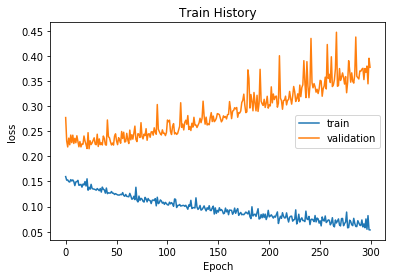

In [12]:
show_train_history(train_history_LSTM3, 'loss', 'val_loss')

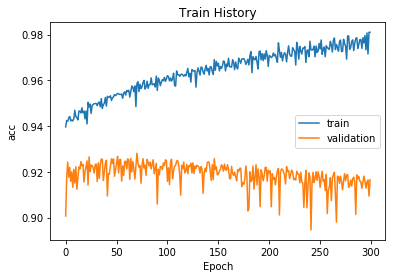

In [13]:
show_train_history(train_history_LSTM3, 'acc', 'val_acc')